# 文本识别实战

上一章理论部分，介绍了文本识别领域的主要方法，其中CRNN是较早被提出也是目前工业界应用较多的方法。本章将详细介绍如何基于PaddleOCR完成CRNN文本识别模型的搭建、训练、评估和预测。数据集采用 icdar 2015，其中训练集有4468张，测试集有2077张。


通过本章的学习，你可以掌握：

1. 如何使用paddleocr whl 包快速完成文本识别预测

2. CRNN的基本原理和网络结构

3. 模型训练的必须步骤和调参方式

4. 使用自定义的数据集训练网络


## 1. 快速体验

### 1.1 安装相关的依赖及whl包

首先确认安装了 paddle 以及 paddleocr，如果已经安装过，忽略该步骤。

In [ ]:
# 安装 PaddlePaddle GPU 版本
!pip install paddlepaddle-gpu
# 安装 paddleocr whl包
! pip install -U pip
! pip install paddleocr

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 1.7MB 8.4MB/s eta 0:00:01
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 250 kB 3.3 MB/s            
     |████████████████████████████████| 299 kB 12.8 MB/s            
     |████████████████████████████████| 6.4 MB 52.4 MB/s            
     |████████████████████████████████| 50 kB 1.6 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 13.3 MB 56.1 MB/s            
     |████████████████████████████████| 948 kB 62.9 MB/s            
     |████████████████████████████████| 55.7 MB 44 kB/s              0:01
     |████████████████████████████████| 1.1 MB 14.5 MB/s            
     |████████████████████████████████| 5

### 1.2 快速预测文字内容

paddleocr whl包会自动下载ppocr轻量级模型作为默认模型

下面展示如何使用whl包进行识别预测：

测试图片：

![](https://ai-studio-static-online.cdn.bcebos.com/531d9b3aff45449893b33bcb5dd13971057fcb4038f045578b3abd99fa3a96f2)

In [5]:
from paddleocr import PaddleOCR

ocr = PaddleOCR()  # need to run only once to download and load model into memory
img_path = '/home/aistudio/work/word_19.png'
result = ocr.ocr(img_path, det=False)
for line in result:
    print(line)

[2021/12/23 20:28:44] root WARNING: version 2.1 not support cls models, use version 2.0 instead
download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_det_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/det/ch/ch_PP-OCRv2_det_infer/ch_PP-OCRv2_det_infer.tar


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

download https://paddleocr.bj.bcebos.com/PP-OCRv2/chinese/ch_PP-OCRv2_rec_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/rec/ch/ch_PP-OCRv2_rec_infer/ch_PP-OCRv2_rec_infer.tar


 24%|██▍       | 2.15M/8.88M [00:00<00:00, 10.8MiB/s]100%|██████████| 8.88M/8.88M [00:01<00:00, 6.38MiB/s]
 17%|█▋        | 249k/1.45M [00:00<00:00, 2.42MiB/s]

download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /home/aistudio/.paddleocr/2.2.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


 90%|█████████ | 1.31M/1.45M [00:00<00:00, 3.32MiB/s]100%|██████████| 1.45M/1.45M [00:00<00:00, 4.53MiB/s]


Namespace(benchmark=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='/home/aistudio/.paddleocr/2.2.1/ocr/det/ch/ch_PP-OCRv2_det_infer', det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_polygon=True, e2e_pgnet_score_thresh=0.5, e2e_pgnet_valid_set='totaltext', enable_mkldnn=False, gpu_mem=500, help='==SUPPRESS==', image_dir=None, ir_optim=True, label_list=['0', '180'], lang='ch', layout_path_mod

执行完上述代码块，将返回识别结果和识别置信度

```
('SLOW', 0.9776376)
```

至此，你掌握了如何使用 paddleocr whl 包进行预测。`./work/` 路径下有更多测试图片，可以尝试其他图片结果。

## 2. 预测原理详解

第一节中 paddleocr 加载训练好的 CRNN 识别模型进行预测，本节将详细介绍 CRNN 的原理及流程。

### 2.1 所属类别

CRNN 是基于CTC的算法，在理论部分介绍的分类图中，处在如下位置。可以看出CRNN主要用于解决规则文本，基于CTC的算法有较快的预测速度并且很好的适用长文本。因此CRNN是PPOCR选择的中文识别算法。
<center><img src=https://ai-studio-static-online.cdn.bcebos.com/0e74d46918e5423684e06df8e6eb992cf9f7c485d6c142fb98cc263714559898 width="600"></center>


### 2.2 算法详解

CRNN 的网络结构体系如下所示，从下往上分别为卷积层、递归层和转录层三部分：

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/f6fae3ff66bd413fa182d75782034a2af6aab1994fa148a08e6565f3fb75b18d width="600"></center>

1)backbone：

卷积网络作为底层的骨干网络，用于从输入图像中提取特征序列。由于 `conv`、`max-pooling`、`elementwise` 和激活函数都作用在局部区域上，所以它们是平移不变的。因此，特征映射的每一列对应于原始图像的一个矩形区域(称为感受野)，并且这些矩形区域与它们在特征映射上对应的列从左到右的顺序相同。由于CNN需要将输入的图像缩放到固定的尺寸以满足其固定的输入维数，因此它不适合长度变化很大的序列对象。为了更好的支持变长序列，CRNN将backbone最后一层输出的特征向量送到了RNN层，转换为序列特征。

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/6694818123724b0d92d05b63dc9dfb08c7ced6c47c3b4f4d9b110ae9ccfe941d width="600"></center>

2)neck: 

递归层，在卷积网络的基础上，构建递归网络，将图像特征转换为序列特征，预测每个帧的标签分布。
RNN具有很强的捕获序列上下文信息的能力。使用上下文线索进行基于图像的序列识别比单独处理每个像素更有效。以场景文本识别为例，宽字符可能需要几个连续的帧来充分描述。此外，有些歧义字符在观察其上下文时更容易区分。其次，RNN可以将误差差分反向传播回卷积层，使网络可以统一训练。第三，RNN能够对任意长度的序列进行操作，解决了文本图片变长的问题。CRNN使用双层LSTM作为递归层，解决了长序列训练过程中的梯度消失和梯度爆炸问题。

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/41cdb7fb08fb4b55923b0baf66b783e46fd063223d05416fa952369ad20ac83c width="600"></center>


3)head: 

转录层，通过全连接网络和softmax激活函数，将每帧的预测转换为最终的标签序列。最后使用 CTC Loss 在无需序列对齐的情况下，完成CNN和RNN的联合训练。CTC 有一套特别的合并序列机制，LSTM输出序列后，需要在时序上分类得到预测结果。可能存在多个时间步对应同一个类别，因此需要对相同结果进行合并。为避免合并本身存在的重复字符，CTC 引入了一个 `blank` 字符插入在重复字符之间。

<center><img src=https://ai-studio-static-online.cdn.bcebos.com/bea6be2f5d9d4ac791118737c3f2f140a2a261e0d8a540a3b0ef239b6bcb2c43 width="600"></center>



### 2.3 代码实现

整个网络结构非常简洁，代码实现也相对简单，可以跟随预测流程依次搭建模块。本节需要完成：数据输入、backbone搭建、neck搭建、head搭建。

**【数据输入】**

数据送入网络前需要缩放到统一尺寸(3,32,320)，并完成归一化处理。这里省略掉训练时需要的数据增强部分，以单张图为例展示预处理的必须步骤（[源码位置](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/data/imaug/rec_img_aug.py#L126)）：


In [ ]:
import cv2
import math
import numpy as np

def resize_norm_img(img):
    """
    数据缩放和归一化
    :param img: 输入图片
    """

    # 默认输入尺寸
    imgC = 3
    imgH = 32
    imgW = 320

    # 图片的真实高宽
    h, w = img.shape[:2]
    # 图片真实长宽比
    ratio = w / float(h)

    # 按比例缩放
    if math.ceil(imgH * ratio) > imgW:
        # 如大于默认宽度，则宽度为imgW
        resized_w = imgW
    else:
        # 如小于默认宽度则以图片真实宽为准
        resized_w = int(math.ceil(imgH * ratio))
    # 缩放
    resized_image = cv2.resize(img, (resized_w, imgH))
    resized_image = resized_image.astype('float32')
    # 归一化
    resized_image = resized_image.transpose((2, 0, 1)) / 255
    resized_image -= 0.5
    resized_image /= 0.5
    # 对宽度不足的位置，补0
    padding_im = np.zeros((imgC, imgH, imgW), dtype=np.float32)
    padding_im[:, :, 0:resized_w] = resized_image
    # 转置 padding 后的图片用于可视化
    draw_img = padding_im.transpose((1,2,0))
    return padding_im, draw_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


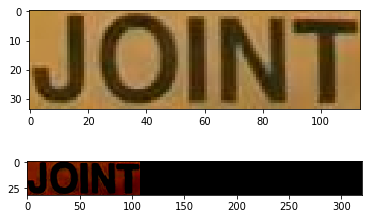

In [ ]:
import matplotlib.pyplot as plt
# 读图
raw_img = cv2.imread("/home/aistudio/work/word_1.png")
plt.figure()
plt.subplot(2,1,1)
# 可视化原图
plt.imshow(raw_img)
# 缩放并归一化
padding_im, draw_img = resize_norm_img(raw_img)
plt.subplot(2,1,2)
# 可视化网络输入图
plt.imshow(draw_img)
plt.show()

**【网络结构】**

* backbone

PaddleOCR 使用 MobileNetV3 作为骨干网络，组网顺序与网络结构一致，首先定义网络中的公共模块([源码位置](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/backbones/rec_mobilenet_v3.py))：ConvBNLayer、ResidualUnit、make_divisible

In [ ]:
import paddle
import paddle.nn as nn
import paddle.nn.functional as F

class ConvBNLayer(nn.Layer):
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 stride,
                 padding,
                 groups=1,
                 if_act=True,
                 act=None):
        """
        卷积BN层
        :param in_channels: 输入通道数
        :param out_channels: 输出通道数
        :param kernel_size: 卷积核尺寸
        :parma stride: 步长大小
        :param padding: 填充大小
        :param groups: 二维卷积层的组数
        :param if_act: 是否添加激活函数
        :param act: 激活函数
        """
        super(ConvBNLayer, self).__init__()
        self.if_act = if_act
        self.act = act
        self.conv = nn.Conv2D(
            in_channels=in_channels,
            out_channels=out_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=padding,
            groups=groups,
            bias_attr=False)

        self.bn = nn.BatchNorm(num_channels=out_channels, act=None)

    def forward(self, x):
        # conv层
        x = self.conv(x)
        # batchnorm层
        x = self.bn(x)
        # 是否使用激活函数
        if self.if_act:
            if self.act == "relu":
                x = F.relu(x)
            elif self.act == "hardswish":
                x = F.hardswish(x)
            else:
                print("The activation function({}) is selected incorrectly.".
                      format(self.act))
                exit()
        return x

class SEModule(nn.Layer):
    def __init__(self, in_channels, reduction=4):
        """
        SE模块
        :param in_channels: 输入通道数
        :param reduction: 通道缩放率
        """        
        super(SEModule, self).__init__()
        self.avg_pool = nn.AdaptiveAvgPool2D(1)
        self.conv1 = nn.Conv2D(
            in_channels=in_channels,
            out_channels=in_channels // reduction,
            kernel_size=1,
            stride=1,
            padding=0)
        self.conv2 = nn.Conv2D(
            in_channels=in_channels // reduction,
            out_channels=in_channels,
            kernel_size=1,
            stride=1,
            padding=0)

    def forward(self, inputs):
        # 平均池化
        outputs = self.avg_pool(inputs)
        # 第一个卷积层
        outputs = self.conv1(outputs)
        # relu激活函数
        outputs = F.relu(outputs)
        # 第二个卷积层
        outputs = self.conv2(outputs)
        # hardsigmoid 激活函数
        outputs = F.hardsigmoid(outputs, slope=0.2, offset=0.5)
        return inputs * outputs


class ResidualUnit(nn.Layer):
    def __init__(self,
                 in_channels,
                 mid_channels,
                 out_channels,
                 kernel_size,
                 stride,
                 use_se,
                 act=None):
        """
        残差层
        :param in_channels: 输入通道数
        :param mid_channels: 中间通道数
        :param out_channels: 输出通道数
        :param kernel_size: 卷积核尺寸
        :parma stride: 步长大小
        :param use_se: 是否使用se模块
        :param act: 激活函数
        """ 
        super(ResidualUnit, self).__init__()
        self.if_shortcut = stride == 1 and in_channels == out_channels
        self.if_se = use_se

        self.expand_conv = ConvBNLayer(
            in_channels=in_channels,
            out_channels=mid_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            if_act=True,
            act=act)
        self.bottleneck_conv = ConvBNLayer(
            in_channels=mid_channels,
            out_channels=mid_channels,
            kernel_size=kernel_size,
            stride=stride,
            padding=int((kernel_size - 1) // 2),
            groups=mid_channels,
            if_act=True,
            act=act)
        if self.if_se:
            self.mid_se = SEModule(mid_channels)
        self.linear_conv = ConvBNLayer(
            in_channels=mid_channels,
            out_channels=out_channels,
            kernel_size=1,
            stride=1,
            padding=0,
            if_act=False,
            act=None)

    def forward(self, inputs):
        x = self.expand_conv(inputs)
        x = self.bottleneck_conv(x)
        if self.if_se:
            x = self.mid_se(x)
        x = self.linear_conv(x)
        if self.if_shortcut:
            x = paddle.add(inputs, x)
        return x


def make_divisible(v, divisor=8, min_value=None):
    """
    确保被8整除
    """ 
    if min_value is None:
        min_value = divisor
    new_v = max(min_value, int(v + divisor / 2) // divisor * divisor)
    if new_v < 0.9 * v:
        new_v += divisor
    return new_v


利用公共模块搭建骨干网络

In [ ]:
class MobileNetV3(nn.Layer):
    def __init__(self,
                 in_channels=3,
                 model_name='small',
                 scale=0.5,
                 small_stride=None,
                 disable_se=False,
                 **kwargs):
        super(MobileNetV3, self).__init__()
        self.disable_se = disable_se
        
        small_stride = [1, 2, 2, 2]

        if model_name == "small":
            cfg = [
                # k, exp, c,  se,     nl,  s,
                [3, 16, 16, True, 'relu', (small_stride[0], 1)],
                [3, 72, 24, False, 'relu', (small_stride[1], 1)],
                [3, 88, 24, False, 'relu', 1],
                [5, 96, 40, True, 'hardswish', (small_stride[2], 1)],
                [5, 240, 40, True, 'hardswish', 1],
                [5, 240, 40, True, 'hardswish', 1],
                [5, 120, 48, True, 'hardswish', 1],
                [5, 144, 48, True, 'hardswish', 1],
                [5, 288, 96, True, 'hardswish', (small_stride[3], 1)],
                [5, 576, 96, True, 'hardswish', 1],
                [5, 576, 96, True, 'hardswish', 1],
            ]
            cls_ch_squeeze = 576
        else:
            raise NotImplementedError("mode[" + model_name +
                                      "_model] is not implemented!")

        supported_scale = [0.35, 0.5, 0.75, 1.0, 1.25]
        assert scale in supported_scale, \
            "supported scales are {} but input scale is {}".format(supported_scale, scale)

        inplanes = 16
        # conv1
        self.conv1 = ConvBNLayer(
            in_channels=in_channels,
            out_channels=make_divisible(inplanes * scale),
            kernel_size=3,
            stride=2,
            padding=1,
            groups=1,
            if_act=True,
            act='hardswish')
        i = 0
        block_list = []
        inplanes = make_divisible(inplanes * scale)
        for (k, exp, c, se, nl, s) in cfg:
            se = se and not self.disable_se
            block_list.append(
                ResidualUnit(
                    in_channels=inplanes,
                    mid_channels=make_divisible(scale * exp),
                    out_channels=make_divisible(scale * c),
                    kernel_size=k,
                    stride=s,
                    use_se=se,
                    act=nl))
            inplanes = make_divisible(scale * c)
            i += 1
        self.blocks = nn.Sequential(*block_list)

        self.conv2 = ConvBNLayer(
            in_channels=inplanes,
            out_channels=make_divisible(scale * cls_ch_squeeze),
            kernel_size=1,
            stride=1,
            padding=0,
            groups=1,
            if_act=True,
            act='hardswish')

        self.pool = nn.MaxPool2D(kernel_size=2, stride=2, padding=0)
        self.out_channels = make_divisible(scale * cls_ch_squeeze)

    def forward(self, x):
        x = self.conv1(x)
        x = self.blocks(x)
        x = self.conv2(x)
        x = self.pool(x)
        return x


至此就完成了骨干网络的定义，可通过 paddle.summary 结构可视化整个网络结构：

In [ ]:
# 定义网络输入shape
IMAGE_SHAPE_C = 3
IMAGE_SHAPE_H = 32
IMAGE_SHAPE_W = 320


# 可视化网络结构
paddle.summary(MobileNetV3(),[(1, IMAGE_SHAPE_C, IMAGE_SHAPE_H, IMAGE_SHAPE_W)])

-------------------------------------------------------------------------------
   Layer (type)         Input Shape          Output Shape         Param #    
     Conv2D-1        [[1, 3, 32, 320]]     [1, 8, 16, 160]          216      
    BatchNorm-1      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-1     [[1, 3, 32, 320]]     [1, 8, 16, 160]           0       
     Conv2D-2        [[1, 8, 16, 160]]     [1, 8, 16, 160]          64       
    BatchNorm-2      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-2     [[1, 8, 16, 160]]     [1, 8, 16, 160]           0       
     Conv2D-3        [[1, 8, 16, 160]]     [1, 8, 16, 160]          72       
    BatchNorm-3      [[1, 8, 16, 160]]     [1, 8, 16, 160]          32       
   ConvBNLayer-3     [[1, 8, 16, 160]]     [1, 8, 16, 160]           0       
AdaptiveAvgPool2D-1  [[1, 8, 16, 160]]       [1, 8, 1, 1]            0       
     Conv2D-4          [[1, 8, 1, 1]]        [1, 2, 1, 1]     

{'total_params': 259056, 'trainable_params': 246736}

In [ ]:
# 图片输入骨干网络
backbone = MobileNetV3()
# 将numpy数据转换为Tensor
input_data = paddle.to_tensor([padding_im])
# 骨干网络输出
feature = backbone(input_data)
# 查看feature map的纬度
print("backbone output:", feature.shape)

backbone output: [1, 288, 1, 80]


* neck

neck 部分将backbone输出的视觉特征图转换为1维向量输入送到 LSTM 网络中，输出序列特征（ [源码位置](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/necks/rnn.py) ）：

In [ ]:
class Im2Seq(nn.Layer):
    def __init__(self, in_channels, **kwargs):
        """
        图像特征转换为序列特征
        :param in_channels: 输入通道数
        """ 
        super().__init__()
        self.out_channels = in_channels

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == 1
        x = x.squeeze(axis=2)
        x = x.transpose([0, 2, 1])  # (NWC)(batch, width, channels)
        return x

class EncoderWithRNN(nn.Layer):
    def __init__(self, in_channels, hidden_size):
        super(EncoderWithRNN, self).__init__()
        self.out_channels = hidden_size * 2
        self.lstm = nn.LSTM(
            in_channels, hidden_size, direction='bidirectional', num_layers=2)

    def forward(self, x):
        x, _ = self.lstm(x)
        return x


class SequenceEncoder(nn.Layer):
    def __init__(self, in_channels, hidden_size=48, **kwargs):
        """
        序列编码
        :param in_channels: 输入通道数
        :param hidden_size: 隐藏层size
        """ 
        super(SequenceEncoder, self).__init__()
        self.encoder_reshape = Im2Seq(in_channels)

        self.encoder = EncoderWithRNN(
            self.encoder_reshape.out_channels, hidden_size)
        self.out_channels = self.encoder.out_channels

    def forward(self, x):
        x = self.encoder_reshape(x)
        x = self.encoder(x)
        return x


In [ ]:
neck = SequenceEncoder(in_channels=288)
sequence = neck(feature)
print("sequence shape:", sequence.shape)

sequence shape: [1, 80, 96]


* head

预测头部分由全连接层和softmax组成，用于计算序列特征时间步上的标签概率分布，本示例仅支持模型识别小写英文字母和数字（26+10）36个类别（[源码位置](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/modeling/heads/rec_ctc_head.py)）:

In [ ]:
class CTCHead(nn.Layer):
    def __init__(self,
                 in_channels,
                 out_channels,
                 **kwargs):
        """
        CTC 预测层
        :param in_channels: 输入通道数
        :param out_channels: 输出通道数
        """ 
        super(CTCHead, self).__init__()
        self.fc = nn.Linear(
            in_channels,
            out_channels)
        
        # 思考：out_channels 应该等于多少？
        self.out_channels = out_channels

    def forward(self, x):
        predicts = self.fc(x)
        result = predicts

        if not self.training:
            predicts = F.softmax(predicts, axis=2)
            result = predicts

        return result

在网络随机初始化的情况下，输出结果是无序的，经过SoftMax之后，可以得到各时间步上的概率最大的预测结果，其中：`pred_id` 代表预测的标签ID，`pre_scores` 代表预测结果的置信度：

In [ ]:
ctc_head = CTCHead(in_channels=96, out_channels=37)
predict = ctc_head(sequence)
print("predict shape:", predict.shape)
result = F.softmax(predict, axis=2)
pred_id = paddle.argmax(result, axis=2)
pred_socres = paddle.max(result, axis=2)
print("pred_id:", pred_id)
print("pred_scores:", pred_socres)

predict shape: [1, 80, 37]
pred_id: Tensor(shape=[1, 80], dtype=int64, place=CUDAPlace(0), stop_gradient=False,
       [[23, 28, 23, 23, 23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 31, 23, 23, 23, 23, 23, 23, 23, 31, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 5 ]])
pred_scores: Tensor(shape=[1, 80], dtype=float32, place=CUDAPlace(0), stop_gradient=False,
       [[0.03683758, 0.03368053, 0.03604801, 0.03504696, 0.03696444, 0.03597261, 0.03925638, 0.03650934, 0.03873367, 0.03572492, 0.03543066, 0.03618268, 0.03805700, 0.03496549, 0.03329032, 0.03565763, 0.03846950, 0.03922413, 0.03970327, 0.03638541, 0.03572393, 0.03618102, 0.03565401, 0.03636984, 0.03691722, 0.03718850, 0.03623354, 0.03877943, 0.03731697, 0.03563465, 0.03447339, 0.03365586, 0.03312979, 0.03285240, 0.03273271, 0.03269565, 0.03269779, 0.03271412, 0

* 后处理

识别网络最终返回的结果是各个时间步上的最大索引值，最终期望的输出是对应的文字结果，因此CRNN的后处理是一个解码过程，主要逻辑如下：

In [ ]:
def decode(text_index, text_prob=None, is_remove_duplicate=False):
    """ convert text-index into text-label. """
    character = "-0123456789abcdefghijklmnopqrstuvwxyz"
    result_list = []
    # 忽略tokens [0] 代表ctc中的blank位
    ignored_tokens = [0]
    batch_size = len(text_index)
    for batch_idx in range(batch_size):
        char_list = []
        conf_list = []
        for idx in range(len(text_index[batch_idx])):
            if text_index[batch_idx][idx] in ignored_tokens:
                continue
            # 合并blank之间相同的字符
            if is_remove_duplicate:
                # only for predict
                if idx > 0 and text_index[batch_idx][idx - 1] == text_index[
                        batch_idx][idx]:
                    continue
            # 将解码结果存在char_list内
            char_list.append(character[int(text_index[batch_idx][
                idx])])
            # 记录置信度
            if text_prob is not None:
                conf_list.append(text_prob[batch_idx][idx])
            else:
                conf_list.append(1)
        text = ''.join(char_list)
        # 输出结果
        result_list.append((text, np.mean(conf_list)))
    return result_list

以 head 部分随机初始化预测出的结果为例，进行解码得到：

In [ ]:
pred_id = paddle.argmax(result, axis=2)
pred_socres = paddle.max(result, axis=2)
print(pred_id)
decode_out = decode(pred_id, pred_socres)
print("decode out:", decode_out)

Tensor(shape=[1, 80], dtype=int64, place=CUDAPlace(0), stop_gradient=False,
       [[23, 28, 23, 23, 23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 31, 23, 23, 23, 23, 23, 23, 23, 31, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 5 ]])
decode out: [('mrmmmmmmmmmtttummmmmmmummmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm4', 0.034180813)]


**小测试：** 如果输入模型训练好的index，解码结果是否正确呢？

In [ ]:
# 替换模型预测好的结果
right_pred_id = paddle.to_tensor([['xxxxxxxxxxxxx']])
tmp_scores = paddle.ones(shape=right_pred_id.shape)
out = decode(right_pred_id, tmp_scores)
print("out:",out)

out: [('pain', 1.0)]


上述步骤完成了网络的搭建，也实现了一个简单的前向预测过程。

没有经过训练的网络无法正确预测结果，因此需要定义损失函数、优化策略，将整个网络run起来，下面将详细介绍网络训练原理。


## 3. 训练原理详解
### 3.1 准备训练数据
PaddleOCR 支持两种数据格式:
 - `lmdb` 用于训练以lmdb格式存储的数据集(LMDBDataSet);
 - `通用数据` 用于训练以文本文件存储的数据集(SimpleDataSet);
 
 本次只介绍通用数据格式读取

训练数据的默认存储路径是 `./train_data`, 执行以下命令解压数据：

In [ ]:
!cd /home/aistudio/work/train_data/ && tar xf ic15_data.tar 

解压完成后，训练图片都在同一个文件夹内，并有一个txt文件（rec_gt_train.txt）记录图片路径和标签，txt文件里的内容如下:

```
" 图像文件名         图像标注信息 "

train/word_1.png	Genaxis Theatre
train/word_2.png	[06]
...
```

**注意：** txt文件中默认将图片路径和图片标签用 \t 分割，如用其他方式分割将造成训练报错。


数据集应有如下文件结构：
```
|-train_data
  |-ic15_data
    |- rec_gt_train.txt
    |- train
        |- word_001.png
        |- word_002.jpg
        |- word_003.jpg
        | ...
    |- rec_gt_test.txt
    |- test
        |- word_001.png
        |- word_002.jpg
        |- word_003.jpg
        | ...
```


确认配置文件中的数据路径是否正确，以 [rec_icdar15_train.yml](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/configs/rec/rec_icdar15_train.yml)为例：

```
Train:
  dataset:
    name: SimpleDataSet
    # 训练数据根目录
    data_dir: ./train_data/ic15_data/
    # 训练数据标签
    label_file_list: ["./train_data/ic15_data/rec_gt_train.txt"]
    transforms:
      - DecodeImage: # load image
          img_mode: BGR
          channel_first: False
      - CTCLabelEncode: # Class handling label
      - RecResizeImg:
          image_shape: [3, 32, 100]  # [3,32,320]
      - KeepKeys:
          keep_keys: ['image', 'label', 'length'] # dataloader will return list in this order
  loader:
    shuffle: True
    batch_size_per_card: 256
    drop_last: True
    num_workers: 8
    use_shared_memory: False

Eval:
  dataset:
    name: SimpleDataSet
    # 评估数据根目录
    data_dir: ./train_data/ic15_data
    # 评估数据标签
    label_file_list: ["./train_data/ic15_data/rec_gt_test.txt"]
    transforms:
      - DecodeImage: # load image
          img_mode: BGR
          channel_first: False
      - CTCLabelEncode: # Class handling label
      - RecResizeImg:
          image_shape: [3, 32, 100]
      - KeepKeys:
          keep_keys: ['image', 'label', 'length'] # dataloader will return list in this order
  loader:
    shuffle: False
    drop_last: False
    batch_size_per_card: 256
    num_workers: 4
    use_shared_memory: False
    ```

### 3.2 数据预处理

送入网络的训练数据，需要保证一个batch内维度一致，同时为了不同维度之间的特征在数值上有一定的比较性，需要对数据做统一尺度**缩放**和**归一化**。

为了增加模型的鲁棒性，抑制过拟合提升泛化性能，需要实现一定的**数据增广**。

* 缩放和归一化

第二节中已经介绍了相关内容，这是图片送入网络之前的最后一步操作。调用 `resize_norm_img` 完成图片缩放、padding和归一化。

* 数据增广

PaddleOCR中实现了多种数据增广方式，如：颜色反转、随机切割、仿射变化、随机噪声等等，这里以简单的随机切割为例，更多增广方式可参考：[rec_img_aug.py](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/data/imaug/rec_img_aug.py)

In [ ]:
def get_crop(image):
    """
    random crop
    """
    import random
    h, w, _ = image.shape
    top_min = 1
    top_max = 8
    top_crop = int(random.randint(top_min, top_max))
    top_crop = min(top_crop, h - 1)
    crop_img = image.copy()
    ratio = random.randint(0, 1)
    if ratio:
        crop_img = crop_img[top_crop:h, :, :]
    else:
        crop_img = crop_img[0:h - top_crop, :, :]
    return crop_img


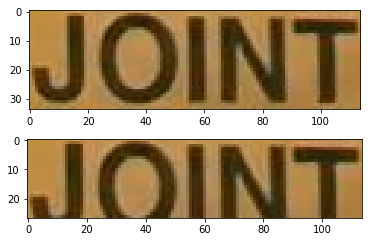

In [ ]:
# 读图
raw_img = cv2.imread("/home/aistudio/work/word_1.png")
plt.figure()
plt.subplot(2,1,1)
# 可视化原图
plt.imshow(raw_img)
# 随机切割
crop_img = get_crop(raw_img)
plt.subplot(2,1,2)
# 可视化增广图
plt.imshow(crop_img)
plt.show()

### 3.3 训练主程序

模型训练的入口代码是 [train.py](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/tools/train.py)，它展示了训练中所需的各个模块： `build dataloader`, `build post process`, `build model` , `build loss`, `build optim`, `build metric`，将各部分串联后即可开始训练：

* 构建 dataloader

训练模型需要将数据组成指定数目的 batch ，并在训练过程中依次 yield 出来，本例中调用了 PaddleOCR 中实现的 [SimpleDataSet](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/ppocr/data/simple_dataset.py)

基于原始代码稍作修改，其返回单条数据的主要逻辑如下

In [ ]:
def __getitem__(data_line, data_dir):
    import os
    mode = "train"
    delimiter = '\t'
    try:
        substr = data_line.strip("\n").split(delimiter)
        file_name = substr[0]
        label = substr[1]
        img_path = os.path.join(data_dir, file_name)
        data = {'img_path': img_path, 'label': label}
        if not os.path.exists(img_path):
            raise Exception("{} does not exist!".format(img_path))
        with open(data['img_path'], 'rb') as f:
            img = f.read()
            data['image'] = img
        # 预处理操作，先注释掉
        # outs = transform(data, self.ops)
        outs = data
    except Exception as e:
        print("When parsing line {}, error happened with msg: {}".format(
                data_line, e))
        outs = None
    return outs

假设当前输入的标签为 `train/word_1.png	Genaxis Theatre`, 训练数据的路径为 `/home/aistudio/work/train_data/ic15_data/`, 解析出的结果是一个字典，里面包含 `img_path` `label` `image` 三个字段：

In [ ]:
data_line = "train/word_1.png	Genaxis Theatre"
data_dir = "/home/aistudio/work/train_data/ic15_data/"

item = __getitem__(data_line, data_dir)
print(item)

{'img_path': '/home/aistudio/work/train_data/ic15_data/train/word_1.png', 'label': 'Genaxis Theatre', 'image': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00Y\x00\x00\x00\x0e\x08\x02\x00\x00\x00\xcb\xe2\'\xb7\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x0bmIDATHK\x8d\x96\xf9S[\xd7\x15\x80\x01\xa7\x93\xa4\xfd1\x99L\xea\x80\xc4\xa2]B\x0bb\xdf\x84\x04\x18\x8c\x01\xb3\x8aE\xec\x12\x02\t\xb4KhC\xfb\xbe=\xed\xbb\x04\xc2l&N\xd2\xb4\x93i\x9bv\xa6\x7fL\xdb\xe9d\xe2N\xd3d<u6C\x8f\xc0I\x9c\xb1\x7f\xc8\x9d\x8f3\xf7\xdd\xf7\xee\x9d{\xbfw\xceC\x95\xd3\xc3\xe3\x04\x02\xe1\xad\xb7\xde\xbazv\xf9\xcd7\xdf<~\xfc\xf8\xef\xff\xfc\xc7\xe7\x9f\xff\xfb\x7fO\x9f>y\xf2\xe4\xeb\xaf\xbf\xbe\xbc\xbc|\xedWU\xaf]\xb7\xab\xab\xab\xca\xca\xab\x8a\x8a\x8a\xca\xca\xca\xeb\x08\x97\xb7\xa0sY\xf1\xda\xf7\xdf?\x83vUYQUU\x05wa\xd6w\xcf\x9

实现完单条数据返回逻辑后，调用 `padde.io.Dataloader` 即可把数据组合成batch，具体可参考 [build_dataloader]()


* build model

  build model 即搭建主要网络结构，具体细节如《2.3 代码实现》所述，本节不做过多介绍，各模块代码可参考[modeling](https://github.com/PaddlePaddle/PaddleOCR/tree/release/2.3/ppocr/modeling)

* build loss
  
  CRNN 模型的损失函数为 CTC loss, 飞桨集成了常用的 Loss 函数，只需调用实现即可：

In [ ]:
import paddle.nn as nn
class CTCLoss(nn.Layer):
    def __init__(self, use_focal_loss=False, **kwargs):
        super(CTCLoss, self).__init__()
        # blank 是 ctc 的无意义连接符
        self.loss_func = nn.CTCLoss(blank=0, reduction='none')

    def forward(self, predicts, batch):
        if isinstance(predicts, (list, tuple)):
            predicts = predicts[-1]
        # 转置模型 head 层的预测结果，沿channel层排列
        predicts = predicts.transpose((1, 0, 2)) #[80,1,37]
        N, B, _ = predicts.shape
        preds_lengths = paddle.to_tensor([N] * B, dtype='int64')
        labels = batch[1].astype("int32")
        label_lengths = batch[2].astype('int64')
        # 计算损失函数
        loss = self.loss_func(predicts, labels, preds_lengths, label_lengths)
        loss = loss.mean()
        return {'loss': loss}

* build post process

 具体细节同样在《2.3 代码实现》有详细介绍，实现逻辑与之前一致。

* build optim

优化器使用 `Adam` , 同样调用飞桨API： `paddle.optimizer.Adam`

* build metric

metric 部分用于计算模型指标，PaddleOCR的文本识别中，将整句预测正确判断为预测正确，因此准确率计算主要逻辑如下：

In [ ]:
def metric(preds, labels):    
    correct_num = 0
    all_num = 0
    norm_edit_dis = 0.0
    for (pred), (target) in zip(preds, labels):
        pred = pred.replace(" ", "")
        target = target.replace(" ", "")
        if pred == target:
            correct_num += 1
        all_num += 1
    correct_num += correct_num
    all_num += all_num
    return {
        'acc': correct_num / all_num,
    }

In [ ]:
preds = ["aaa", "bbb", "ccc", "123", "456"]
labels = ["aaa", "bbb", "ddd", "123", "444"]
acc = metric(preds, labels)
print("acc:", acc)
# 五个预测结果中,完全正确的有3个，因此准确率应为0.6

acc: {'acc': 0.6}


将以上各部分组合起来，即是完整的训练流程：

In [ ]:

def main(config, device, logger, vdl_writer):
    # init dist environment
    if config['Global']['distributed']:
        dist.init_parallel_env()

    global_config = config['Global']

    # build dataloader
    train_dataloader = build_dataloader(config, 'Train', device, logger)
    if len(train_dataloader) == 0:
        logger.error(
            "No Images in train dataset, please ensure\n" +
            "\t1. The images num in the train label_file_list should be larger than or equal with batch size.\n"
            +
            "\t2. The annotation file and path in the configuration file are provided normally."
        )
        return

    if config['Eval']:
        valid_dataloader = build_dataloader(config, 'Eval', device, logger)
    else:
        valid_dataloader = None

    # build post process
    post_process_class = build_post_process(config['PostProcess'],
                                            global_config)

    # build model
    # for rec algorithm
    if hasattr(post_process_class, 'character'):
        char_num = len(getattr(post_process_class, 'character'))
        if config['Architecture']["algorithm"] in ["Distillation",
                                                   ]:  # distillation model
            for key in config['Architecture']["Models"]:
                config['Architecture']["Models"][key]["Head"][
                    'out_channels'] = char_num
        else:  # base rec model
            config['Architecture']["Head"]['out_channels'] = char_num

    model = build_model(config['Architecture'])
    if config['Global']['distributed']:
        model = paddle.DataParallel(model)

    # build loss
    loss_class = build_loss(config['Loss'])

    # build optim
    optimizer, lr_scheduler = build_optimizer(
        config['Optimizer'],
        epochs=config['Global']['epoch_num'],
        step_each_epoch=len(train_dataloader),
        parameters=model.parameters())

    # build metric
    eval_class = build_metric(config['Metric'])
    # load pretrain model
    pre_best_model_dict = load_model(config, model, optimizer)
    logger.info('train dataloader has {} iters'.format(len(train_dataloader)))
    if valid_dataloader is not None:
        logger.info('valid dataloader has {} iters'.format(
            len(valid_dataloader)))

    use_amp = config["Global"].get("use_amp", False)
    if use_amp:
        AMP_RELATED_FLAGS_SETTING = {
            'FLAGS_cudnn_batchnorm_spatial_persistent': 1,
            'FLAGS_max_inplace_grad_add': 8,
        }
        paddle.fluid.set_flags(AMP_RELATED_FLAGS_SETTING)
        scale_loss = config["Global"].get("scale_loss", 1.0)
        use_dynamic_loss_scaling = config["Global"].get(
            "use_dynamic_loss_scaling", False)
        scaler = paddle.amp.GradScaler(
            init_loss_scaling=scale_loss,
            use_dynamic_loss_scaling=use_dynamic_loss_scaling)
    else:
        scaler = None

    # start train
    program.train(config, train_dataloader, valid_dataloader, device, model,
                  loss_class, optimizer, lr_scheduler, post_process_class,
                  eval_class, pre_best_model_dict, logger, vdl_writer, scaler)

## 4. 完整训练任务

### 4.1 启动训练

PaddleOCR 识别任务与检测任务类似，是通过配置文件传输参数的。

要进行完整的模型训练，首先需要下载整个项目并安装相关依赖：

In [ ]:
# 克隆PaddleOCR代码
#!git clone https://gitee.com/paddlepaddle/PaddleOCR
# 修改代码运行的默认目录为 /home/aistudio/PaddleOCR
import os
os.chdir("/home/aistudio/PaddleOCR")
# 安装PaddleOCR第三方依赖
!pip install -r requirements.txt

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 12.5 MB 8.4 MB/s            
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.1
    Uninstalling scikit-image-0.19.1:
      Successfully uninstalled scikit-image-0.19.1


创建软链，将训练数据放在PaddleOCR项目下：

In [ ]:
!ln -s /home/aistudio/work/train_data/ /home/aistudio/PaddleOCR/

下载预训练模型：

为了加快收敛速度，建议下载训练好的模型在 icdar2015 数据上进行 finetune

In [ ]:
!cd PaddleOCR/
# 下载MobileNetV3的预训练模型
!wget -nc -P ./pretrain_models/ https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar
# 解压模型参数
!tar -xf pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar && rm -rf pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar

--2021-12-22 15:39:39--  https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar
Resolving paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)... 182.61.200.195, 182.61.200.229, 2409:8c04:1001:1002:0:ff:b001:368a
Connecting to paddleocr.bj.bcebos.com (paddleocr.bj.bcebos.com)|182.61.200.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51200000 (49M) [application/x-tar]
Saving to: ‘./pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar’

rec_mv3_none_bilstm 100%[===================>]  48.83M  15.5MB/s    in 3.6s    

2021-12-22 15:39:42 (13.7 MB/s) - ‘./pretrain_models/rec_mv3_none_bilstm_ctc_v2.0_train.tar’ saved [51200000/51200000]



启动训练命令很简单，指定好配置文件即可。另外在命令行中可以通过 `-o` 修改配置文件中的参数值。启动训练命令如下所示

其中：

* `Global.pretrained_model`: 加载的预训练模型路径
* `Global.character_dict_path` ： 字典路径（这里只支持26个小写字母+数字）
* `Global.eval_batch_step` ： 评估频率
* `Global.epoch_num`： 总训练轮数



In [4]:
!python3 tools/train.py -c configs/rec/rec_icdar15_train.yml \
   -o Global.pretrained_model=rec_mv3_none_bilstm_ctc_v2.0_train/best_accuracy \
   Global.character_dict_path=ppocr/utils/ic15_dict.txt \
   Global.eval_batch_step=[0,200] \
   Global.epoch_num=40

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:241: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=np.bool)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/skimage/morphology/_skeletonize.py:256: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  0

根据配置文件中设置的的 `save_model_dir` 字段，会有以下几种参数被保存下来：

```
output/rec/ic15
├── best_accuracy.pdopt  
├── best_accuracy.pdparams  
├── best_accuracy.states  
├── config.yml  
├── iter_epoch_3.pdopt  
├── iter_epoch_3.pdparams  
├── iter_epoch_3.states  
├── latest.pdopt  
├── latest.pdparams  
├── latest.states  
└── train.log
```
其中 best_accuracy.* 是评估集上的最优模型；iter_epoch_x.* 是以 `save_epoch_step` 为间隔保存下来的模型；latest.* 是最后一个epoch的模型。


**总结：**

如果需要训练自己的数据需要修改：

1. 训练和评估数据路径（必须）
2. 字典路径（必须）
3. 预训练模型 （可选）
4. 学习率、image shape、网络结构（可选）

### 4.2 模型评估


评估数据集可以通过 `configs/rec/rec_icdar15_train.yml`  修改Eval中的 `label_file_path` 设置。

这里默认使用 icdar2015 的评估集，加载刚刚训练好的模型权重：

In [ ]:
!python tools/eval.py -c configs/rec/rec_icdar15_train.yml -o Global.checkpoints=output/rec/ic15/best_accuracy \
        Global.character_dict_path=ppocr/utils/ic15_dict.txt


[2021/12/23 14:27:51] root INFO: Architecture : 
[2021/12/23 14:27:51] root INFO:     Backbone : 
[2021/12/23 14:27:51] root INFO:         model_name : large
[2021/12/23 14:27:51] root INFO:         name : MobileNetV3
[2021/12/23 14:27:51] root INFO:         scale : 0.5
[2021/12/23 14:27:51] root INFO:     Head : 
[2021/12/23 14:27:51] root INFO:         fc_decay : 0
[2021/12/23 14:27:51] root INFO:         name : CTCHead
[2021/12/23 14:27:51] root INFO:     Neck : 
[2021/12/23 14:27:51] root INFO:         encoder_type : rnn
[2021/12/23 14:27:51] root INFO:         hidden_size : 96
[2021/12/23 14:27:51] root INFO:         name : SequenceEncoder
[2021/12/23 14:27:51] root INFO:     Transform : None
[2021/12/23 14:27:51] root INFO:     algorithm : CRNN
[2021/12/23 14:27:51] root INFO:     model_type : rec
[2021/12/23 14:27:51] root INFO: Eval : 
[2021/12/23 14:27:51] root INFO:     dataset : 
[2021/12/23 14:27:51] root INFO:         data_dir : ./train_data/ic15_data
[2021/12/23 14:27:51]

评估后，可以看到训练模型在验证集上的精度。

PaddleOCR支持训练和评估交替进行, 可在 `configs/rec/rec_icdar15_train.yml` 中修改 `eval_batch_step` 设置评估频率，默认每2000个iter评估一次。评估过程中默认将最佳acc模型，保存为 `output/rec/ic15/best_accuracy` 。

如果验证集很大，测试将会比较耗时，建议减少评估次数，或训练完再进行评估。

### 4.3 预测

使用 PaddleOCR 训练好的模型，可以通过以下脚本进行快速预测。

预测图片：
![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.3/doc/imgs_words_en/word_19.png)

默认预测图片存储在 `infer_img` 里，通过 `-o Global.checkpoints` 加载训练好的参数文件：

In [ ]:
!python tools/infer_rec.py -c configs/rec/rec_icdar15_train.yml -o Global.checkpoints=output/rec/ic15/best_accuracy Global.character_dict_path=ppocr/utils/ic15_dict.txt

[2021/12/23 14:29:19] root INFO: Architecture : 
[2021/12/23 14:29:19] root INFO:     Backbone : 
[2021/12/23 14:29:19] root INFO:         model_name : large
[2021/12/23 14:29:19] root INFO:         name : MobileNetV3
[2021/12/23 14:29:19] root INFO:         scale : 0.5
[2021/12/23 14:29:19] root INFO:     Head : 
[2021/12/23 14:29:19] root INFO:         fc_decay : 0
[2021/12/23 14:29:19] root INFO:         name : CTCHead
[2021/12/23 14:29:19] root INFO:     Neck : 
[2021/12/23 14:29:19] root INFO:         encoder_type : rnn
[2021/12/23 14:29:19] root INFO:         hidden_size : 96
[2021/12/23 14:29:19] root INFO:         name : SequenceEncoder
[2021/12/23 14:29:19] root INFO:     Transform : None
[2021/12/23 14:29:19] root INFO:     algorithm : CRNN
[2021/12/23 14:29:19] root INFO:     model_type : rec
[2021/12/23 14:29:19] root INFO: Eval : 
[2021/12/23 14:29:19] root INFO:     dataset : 
[2021/12/23 14:29:19] root INFO:         data_dir : ./train_data/ic15_data
[2021/12/23 14:29:19]

得到输入图像的预测结果：

```
infer_img: doc/imgs_words_en/word_19.png
        result: slow	0.8795223
```


### 作业

**【题目1】**

可视化出 PaddleOCR 中的实现的[数据增强](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.4/ppocr/data/imaug/rec_img_aug.py)结果：noise、jitter, 并用语言解释效果。

可选测试图片：

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_1.jpg)

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_2.jpg)

![](https://raw.githubusercontent.com/PaddlePaddle/PaddleOCR/release/2.4/doc/imgs_words/ch/word_3.jpg)


**【题目2】**

更换 configs/rec/rec_icdar15_train.yml 配置中的 backbone 为 PaddleOCR 中的 [ResNet34_vd](https://github.com/PaddlePaddle/PaddleOCR/blob/6ee301be36eb54d91dc437842f754593dce13967/ppocr/modeling/backbones/rec_resnet_vd.py#L176)，当输入图片shape为（3，32，100）时，Head 层最终输出的特征尺寸是多少？


**【题目3】**

下载10W中文数据集[rec_data_lesson_demo](https://paddleocr.bj.bcebos.com/dataset/rec_data_lesson_demo.tar)，修改 configs/rec/rec_icdar15_train.yml  配置文件训练一个识别模型，提供训练log。

可加载预训练模型： https://paddleocr.bj.bcebos.com/dygraph_v2.0/en/rec_mv3_none_bilstm_ctc_v2.0_train.tar 


## 总结

至此，一个基于CRNN的文本识别任务就全部完成了，更多功能和代码可以参考 [PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR)。

如果对项目任何问题或者疑问，欢迎在评论区留言提出